Importing the necessary Python libraries

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns
%matplotlib inline

In [3]:
#import rpy2

# Data Loading

In [4]:
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [5]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [6]:
print(test.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [7]:
summary_df = train.describe()
print(summary_df)

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [8]:
#print structure of data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
None


In [9]:
print(train.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


# Data Description

# Data Understanding

# Plan of Attack

# Data Cleansing

### Remove Whitespace

In [10]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

### NA Values

Replace with central tendency metric

In [12]:
#are the any NA values?
train.isnull().values.any()

True

In [13]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncomeand NumberOfDependents

In [14]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

MonthlyIncome has nearly 20% of it's data as missing. This is quote high and brings us to a decision point. We can drop this column entirely, drop the rows containing missing values, or impute the missing values. SimpleImputation may be subject to error since it would be applying a central tendency value to all 29731 of these rows; however, imputation is important since Machine Learning algorithms don't like missing values. We can also impute using a sophisticated, predictive method. 

From subject matter context, we know that monthly income is a feature important in our dataset and will elect to keep it. Therefore, we will be doing imputation for these missing values. 

In [15]:
train_full = train.copy()

In [16]:
income_median = train_full['MonthlyIncome'].median()

#REMEMBER TO TRY ITERATIVE IMPUTER

#### DO WE NEED TO TAKE MEDIAN FROM NON NA ROWS ONLY?

In [17]:
income_median

5400.0

In [18]:
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [19]:
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [20]:
dependents_median = train_full['NumberOfDependents'].median()

In [21]:
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [22]:
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### Outlier Values

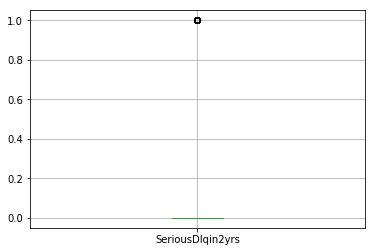

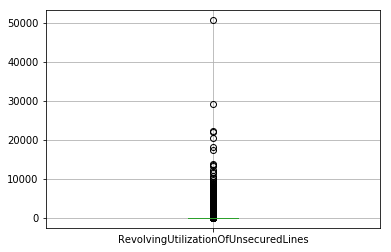

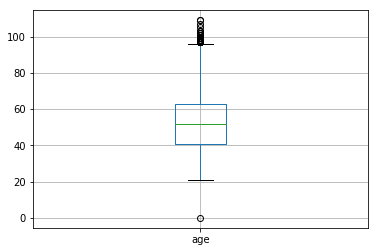

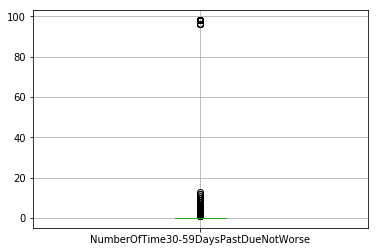

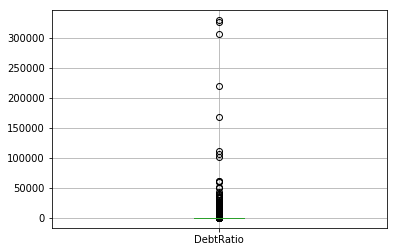

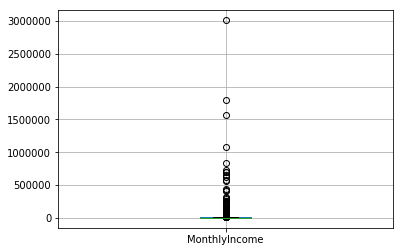

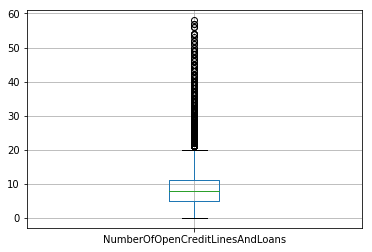

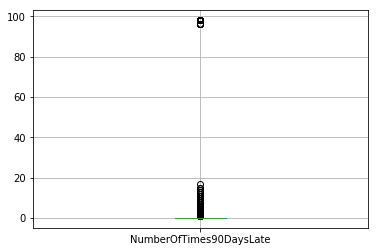

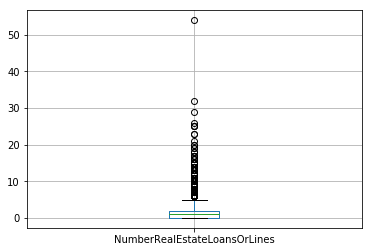

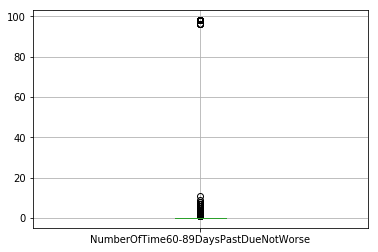

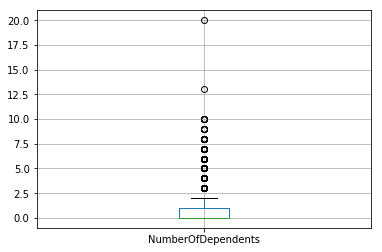

In [28]:
for i in train_full.columns:
    train_full.boxplot(column=i)
    plt.show()


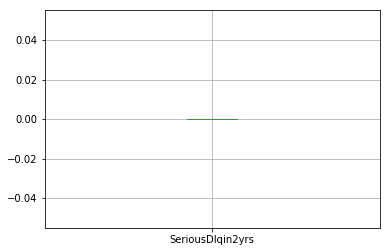

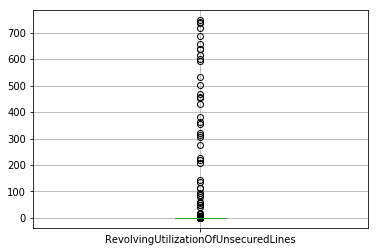

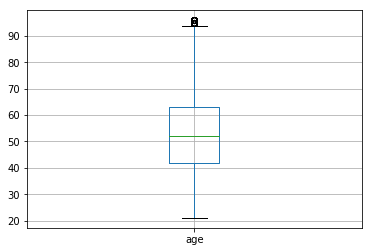

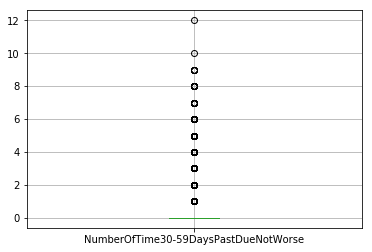

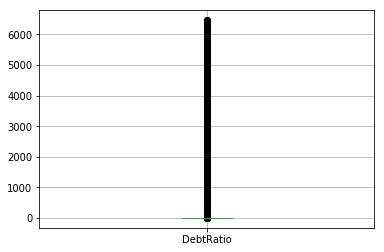

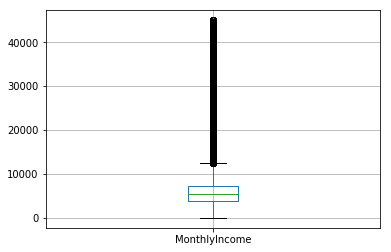

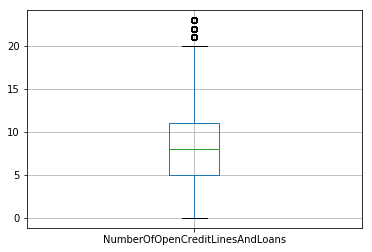

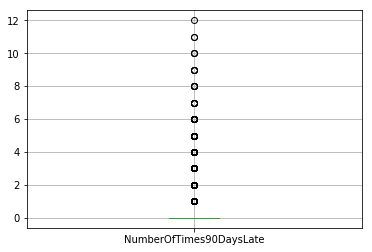

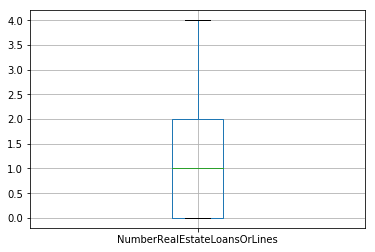

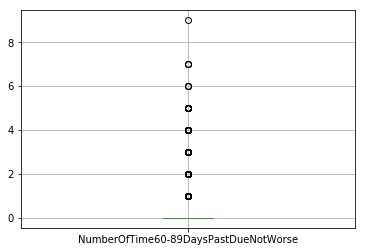

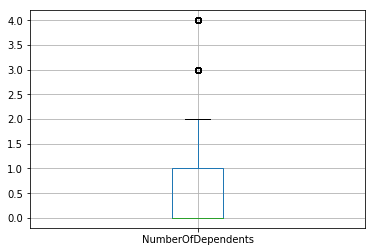

In [39]:
for i in train_no_ol.columns:
    train_no_ol.boxplot(column=i)
    plt.show()


In [30]:
train_no_ol = train_full.copy()

In [33]:
z_score = np.abs(stats.zscore(train_no_ol))
print(z_score)

[[3.73645569 0.02115001 0.49385982 ... 4.40954554 0.05785249 1.14052977]
 [0.26763331 0.02038516 0.83234222 ... 0.90128301 0.05785249 0.23720186]
 [0.26763331 0.02158222 0.96773518 ... 0.90128301 0.05785249 0.66612604]
 ...
 [0.26763331 0.02323239 0.38619443 ... 0.01614492 0.05785249 0.66612604]
 [0.26763331 0.02421753 1.50930703 ... 0.90128301 0.05785249 0.66612604]
 [0.26763331 0.02081306 0.79237332 ... 0.86899317 0.05785249 0.66612604]]


In [34]:
threshold = 3
print(np.where(z_score > threshold))

(array([     0,      0,      4, ..., 149968, 149968, 149979], dtype=int64), array([ 0,  8,  5, ...,  0, 10,  0], dtype=int64))


In [35]:
print(z_score[0][8])

4.409545538528969


In [42]:
#remove outliers that are >3 z-scores from mean
train_no_ol = train_no_ol[(z_score<3).all(axis=1)]

TypeError: unhashable type: 'numpy.ndarray'

In [37]:
train_full.shape

(150000, 11)

In [38]:
train_no_ol.shape

(135159, 11)

# Exploratory Data Visualizations

# Data Standardization/Normalization

In [ ]:
https://scikit-learn.org/stable/modules/preprocessing.html

# Train/Validate Split

# Logistic Regression

### Multi-collinearity analysis

# Decision Tree

# Random Forest

# Support Vector Machines (SVM)

# Artificial Neural Networks (ANN)

# k-Nearest Neighbors (k-NN)

# Stacked Ensemble Model

# Comparison of All Models

# References